In [1]:
import os
import shutil
import tarfile
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
# Get the current working directory
current_folder = os.getcwd()

dataset = tf.keras.utils.get_file(
	fname ="aclImdb.tar.gz",
	origin ="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
	cache_dir= current_folder,
	extract = True)


84125825/84125825 [==============================] - 2s 0us/step


In [3]:
dataset_path = os.path.dirname(dataset)
# Check the dataset
os.listdir(dataset_path)


['aclImdb', 'aclImdb.tar.gz']

In [4]:
# Dataset directory
dataset_dir = os.path.join(dataset_path, 'aclImdb')

# Check the Dataset directory
os.listdir(dataset_dir)


['test', 'train', 'README', 'imdb.vocab', 'imdbEr.txt']

In [5]:
train_dir = os.path.join(dataset_dir,'train')
os.listdir(train_dir)


['pos',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt',
 'unsup',
 'labeledBow.feat',
 'neg']

In [6]:
for file in os.listdir(train_dir):
    file_path = os.path.join(train_dir, file)
    # Check if it's a file (not a directory)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            first_value = f.readline().strip()
            print(f"{file}: {first_value}")
    else:
        print(f"{file}: {file_path}")

pos: /content/datasets/aclImdb/train/pos
unsupBow.feat: 0 0:8 1:6 3:5 4:2 5:1 7:1 8:5 9:2 10:1 11:2 13:3 16:1 17:1 18:1 19:1 22:3 24:1 26:3 28:1 30:1 31:1 35:2 36:1 39:2 40:1 41:2 46:2 47:1 48:1 52:1 63:1 67:1 68:1 74:1 81:1 83:1 87:1 104:1 105:1 112:1 117:1 131:1 151:1 155:1 170:1 198:1 225:1 226:1 288:2 291:1 320:1 331:1 342:1 364:1 374:1 384:2 385:1 407:1 437:1 441:1 465:1 468:1 470:1 519:1 595:1 615:1 650:1 692:1 851:1 937:1 940:1 1100:1 1264:1 1297:1 1317:1 1514:1 1728:1 1793:1 1948:1 2088:1 2257:1 2358:1 2584:2 2645:1 2735:1 3050:1 4297:1 5385:1 5858:1 7382:1 7767:1 7773:1 9306:1 10413:1 11881:1 15907:1 18613:1 18877:1 25479:1
urls_neg.txt: http://www.imdb.com/title/tt0064354/usercomments
urls_pos.txt: http://www.imdb.com/title/tt0453418/usercomments
urls_unsup.txt: http://www.imdb.com/title/tt0018515/usercomments
unsup: /content/datasets/aclImdb/train/unsup
labeledBow.feat: 9 0:9 1:1 2:4 3:4 4:6 5:4 6:2 7:2 8:4 10:4 12:2 26:1 27:1 28:1 29:2 32:1 41:1 45:1 47:1 50:1 54:2 57:1 59:

In [7]:
def load_dataset(directory):
    data = {"sentence": [], "sentiment": []}
    for file_name in os.listdir(directory):
        print(file_name)
        if file_name == 'pos':
            positive_dir = os.path.join(directory, file_name)
            for text_file in os.listdir(positive_dir):
                text = os.path.join(positive_dir, text_file)
                with open(text, "r", encoding="utf-8") as f:
                    data["sentence"].append(f.read())
                    data["sentiment"].append(1)
        elif file_name == 'neg':
            negative_dir = os.path.join(directory, file_name)
            for text_file in os.listdir(negative_dir):
                text = os.path.join(negative_dir, text_file)
                with open(text, "r", encoding="utf-8") as f:
                    data["sentence"].append(f.read())
                    data["sentiment"].append(0)

    return pd.DataFrame.from_dict(data)

In [8]:
# Load the dataset from the train_dir
train_df = load_dataset(train_dir)
print(train_df.head())

pos
unsupBow.feat
urls_neg.txt
urls_pos.txt
urls_unsup.txt
unsup
labeledBow.feat
neg
                                            sentence  sentiment
0  Surely one the French films of the decade so f...          1
1  There's about 25 years worth of inspiration pa...          1
2  This show has a great storyline! It's very bel...          1
3  ''The 40 Year Old Virgin'''made me laugh a lot...          1
4  A linear travel within a non-linear structure....          1


In [9]:
test_dir = os.path.join(dataset_dir,'test')

# Load the dataset from the train_dir
test_df = load_dataset(test_dir)
print(test_df.head())

pos
urls_neg.txt
urls_pos.txt
labeledBow.feat
neg
                                            sentence  sentiment
0  When Melville's "Pierre; or The Ambiguities" h...          1
1  in a time of predictable movies, in which abou...          1
2  As with so many modern US films, there has to ...          1
3  I went to see this film because Joaquim de Alm...          1
4  Meryl Streep as Kate, a woman dying of cancer,...          1


In [10]:
sentiment_counts = train_df['sentiment'].value_counts()

fig =px.bar(x= {0:'Negative',1:'Positive'},
            y= sentiment_counts.values,
            color=sentiment_counts.index,
            color_discrete_sequence =  px.colors.qualitative.Dark24,
            title='<b>Sentiments Counts')

fig.update_layout(title='Sentiments Counts',
                  xaxis_title='Sentiment',
                  yaxis_title='Counts',
                  template='plotly_dark')

# Show the bar chart
fig.show()
pyo.plot(fig, filename = 'Sentiments Counts.html', auto_open = True)

'Sentiments Counts.html'

In [11]:
def text_cleaning(text):
    soup = BeautifulSoup(text, "html.parser")
    text = re.sub(r'\[[^]]*\]', '', soup.get_text())
    pattern = r"[^a-zA-Z0-9\s,']"
    text = re.sub(pattern, '', text)
    return text

In [12]:
# Train dataset
train_df['Cleaned_sentence'] = train_df['sentence'].apply(text_cleaning).tolist()
# Test dataset
test_df['Cleaned_sentence'] = test_df['sentence'].apply(text_cleaning)

<ipython-input-11-4a9c92faa406>:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-11-4a9c92faa406>:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [13]:
# Function to generate word cloud
def generate_wordcloud(text,Title):
    all_text = " ".join(text)
    wordcloud = WordCloud(width=800,
                          height=400,
                          stopwords=set(STOPWORDS),
                          background_color='black').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

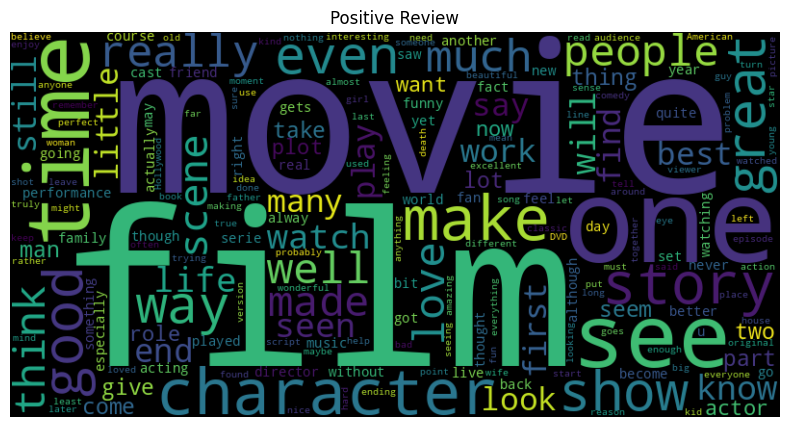

In [14]:
positive = train_df[train_df['sentiment']==1]['Cleaned_sentence'].tolist()
generate_wordcloud(positive,'Positive Review')

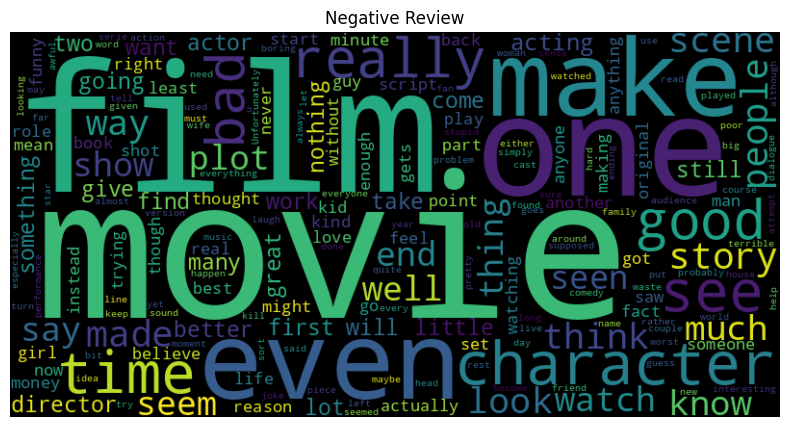

In [15]:
negative = train_df[train_df['sentiment']==0]['Cleaned_sentence'].tolist()
generate_wordcloud(negative,'Negative Review')

In [16]:
# Training data
#Reviews = "[CLS] " +train_df['Cleaned_sentence'] + "[SEP]"
Reviews = train_df['Cleaned_sentence']
Target = train_df['sentiment']

# Test data
#test_reviews =  "[CLS] " +test_df['Cleaned_sentence'] + "[SEP]"
test_reviews = test_df['Cleaned_sentence']
test_targets = test_df['sentiment']

In [17]:
x_val, x_test, y_val, y_test = train_test_split(test_reviews,
                                                    test_targets,
                                                    test_size=0.5,
                                                    stratify = test_targets)

In [18]:
#Tokenize and encode the data using the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



In [19]:
max_len= 128
# Tokenize and encode the sentences
X_train_encoded = tokenizer.batch_encode_plus(Reviews.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_val_encoded = tokenizer.batch_encode_plus(x_val.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_test_encoded = tokenizer.batch_encode_plus(x_test.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')


In [20]:
k = 0
print('Training Comments -->>',Reviews[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',Target[k])

Training Comments -->> Surely one the French films of the decade so far, a taut, atmospheric thriller making full use of the lead characters hearing impediment to use sound in a way rarely explored in cinema Emannuelle Devos gives a truly stunning , multifaceted performance, at times devious and manipulative, at other times open and vulnerable Another reason why those who appreciate quality cinema should keep their eyes open for offerings from France

Input Ids -->>
 tf.Tensor(
[  101  7543  2028  1996  2413  3152  1997  1996  5476  2061  2521  1010
  1037 21642  1010 12483 10874  2437  2440  2224  1997  1996  2599  3494
  4994 17727  2098 14428  3372  2000  2224  2614  1999  1037  2126  6524
 10641  1999  5988  7861 11639 16284  2571 16475  2891  3957  1037  5621
 14726  1010  4800 12172  3064  2836  1010  2012  2335 14386  3560  1998
 23624 14289 26255  1010  2012  2060  2335  2330  1998  8211  2178  3114
  2339  2216  2040  9120  3737  5988  2323  2562  2037  2159  2330  2005
 14927

In [21]:
# Intialize the model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [23]:
# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [24]:
print(X_train_encoded['input_ids'].shape)
print(X_train_encoded['token_type_ids'].shape)
print(X_train_encoded['attention_mask'].shape)
print(Target.shape)


(25000, 128)
(25000, 128)
(25000, 128)
(25000,)


In [25]:
print("Sample input_ids:", X_train_encoded['input_ids'][0])
print("Sample token_type_ids:", X_train_encoded['token_type_ids'][0])
print("Sample attention_mask:", X_train_encoded['attention_mask'][0])


Sample input_ids: tf.Tensor(
[  101  7543  2028  1996  2413  3152  1997  1996  5476  2061  2521  1010
  1037 21642  1010 12483 10874  2437  2440  2224  1997  1996  2599  3494
  4994 17727  2098 14428  3372  2000  2224  2614  1999  1037  2126  6524
 10641  1999  5988  7861 11639 16284  2571 16475  2891  3957  1037  5621
 14726  1010  4800 12172  3064  2836  1010  2012  2335 14386  3560  1998
 23624 14289 26255  1010  2012  2060  2335  2330  1998  8211  2178  3114
  2339  2216  2040  9120  3737  5988  2323  2562  2037  2159  2330  2005
 14927  2013  2605   102     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0], shape=(128,), dtype=int32)
Sample token_type_ids: tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]
)


In [27]:
tf.config.run_functions_eagerly(True)


In [28]:
print(len(X_train_encoded['input_ids']))
print(len(X_val_encoded['input_ids']))
print(len(Target))


25000
12500
25000


In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')],
    run_eagerly=True  # Enable eager execution for detailed debugging
)


In [30]:
history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['attention_mask']],  # Token type IDs may not be needed unless you use specific BERT variations.
    Target,
    validation_data=(
      [X_val_encoded['input_ids'], X_val_encoded['attention_mask']], y_val),
    batch_size=32,
    epochs=3
)


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



782/782 [==============================] - 1273s 2s/step - loss: 0.3428 - accuracy: 0.8440 - val_loss: 0.2724 - val_accuracy: 0.8846
Epoch 2/3
782/782 [==============================] - 1253s 2s/step - loss: 0.2019 - accuracy: 0.9211 - val_loss: 0.2595 - val_accuracy: 0.8946
Epoch 3/3
782/782 [==============================] - 1253s 2s/step - loss: 0.1079 - accuracy: 0.9620 - val_loss: 0.3789 - val_accuracy: 0.8844


In [31]:
#Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']],
    y_test
)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

391/391 [==============================] - 124s 317ms/step - loss: 0.3804 - accuracy: 0.8641
Test loss: 0.38043856620788574, Test accuracy: 0.864080011844635


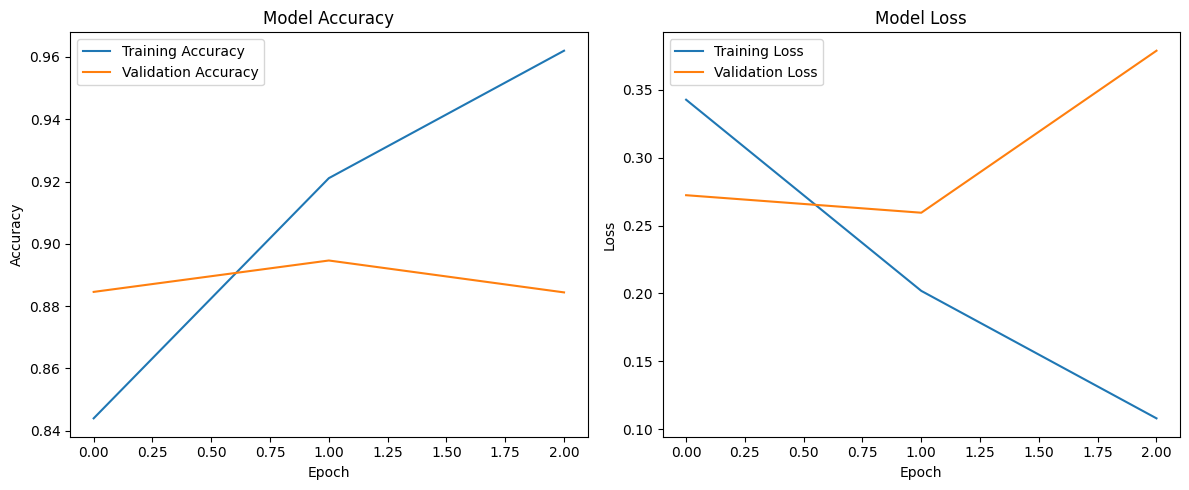

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Display the plots
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



391/391 [==============================] - 116s 296ms/step


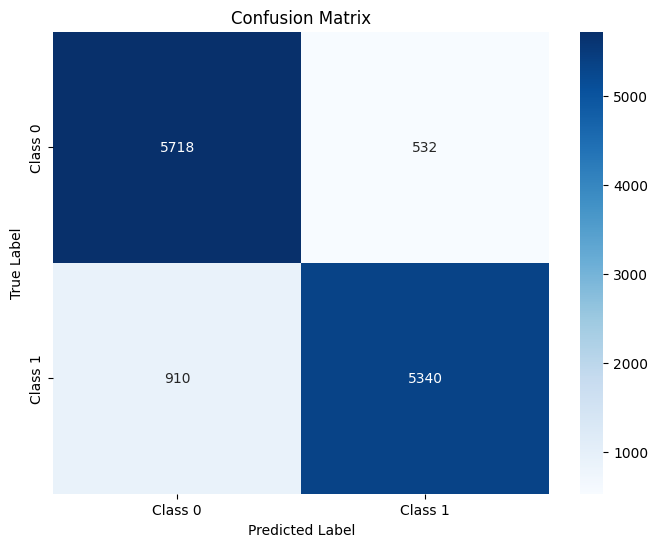

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class names based on your dataset
class_names = ['Class 0', 'Class 1']  # Adjust according to your dataset

# Predict the test data
y_pred = model.predict([X_test_encoded['input_ids'], X_test_encoded['attention_mask']])
logits = y_pred.logits
y_pred_classes = logits.argmax(axis=-1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


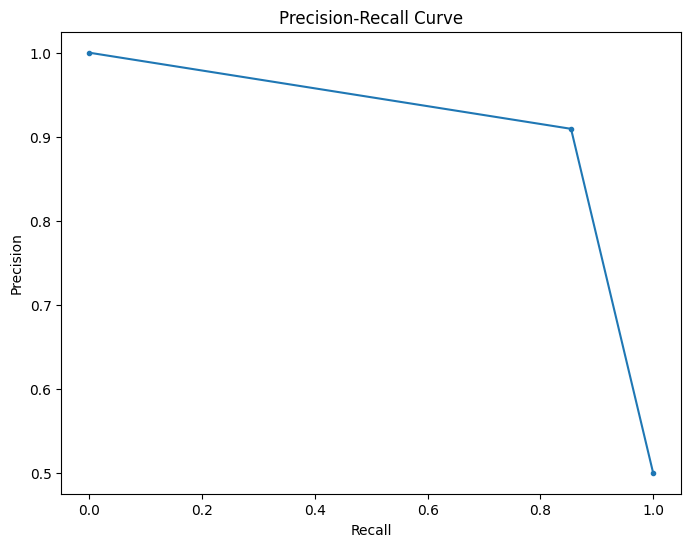

In [37]:
from sklearn.metrics import precision_recall_curve

# For multi-class classification, binarize labels
# If you're doing binary classification, you can use y_test as is

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_classes)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


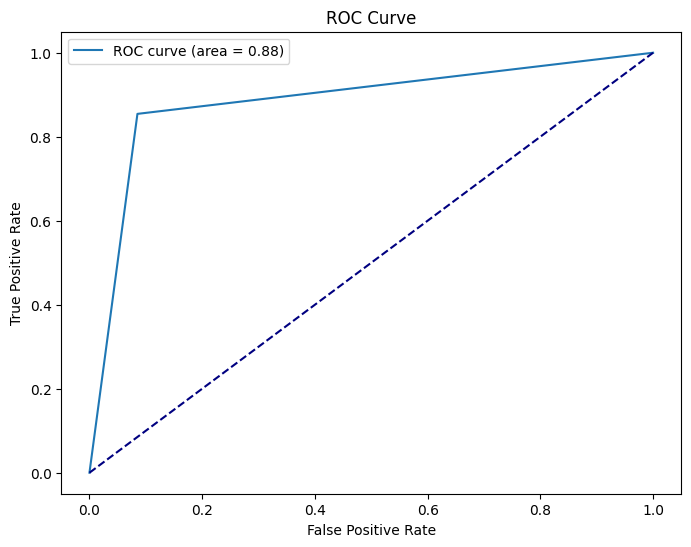

In [38]:
from sklearn.metrics import roc_curve, auc

# For multi-class classification, you can compute the ROC curve for each class.
# Assuming a binary classification, here’s an example:

# Compute ROC curve and AUC for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


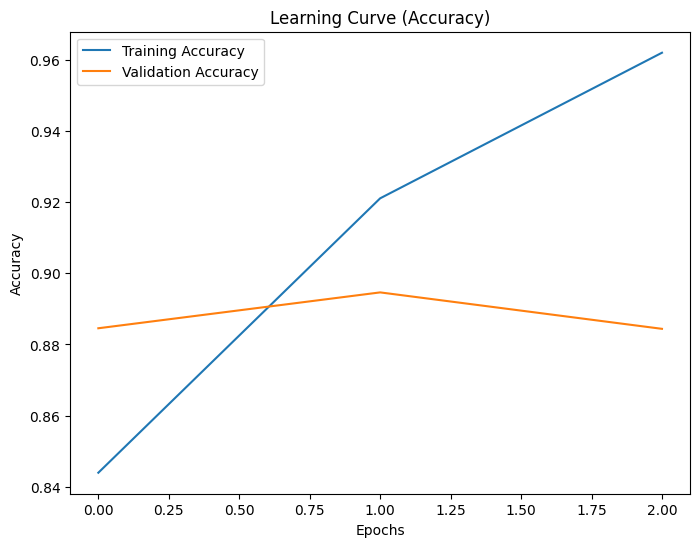

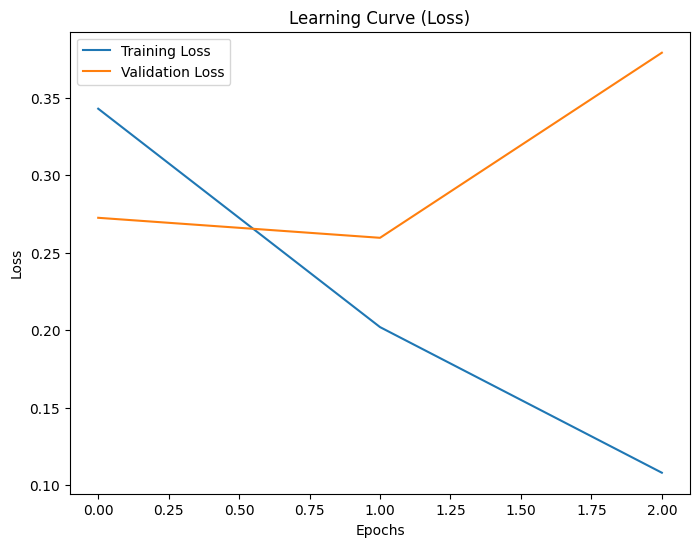

In [39]:
# Training vs validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# Training vs validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()


In [40]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=class_names)

# Print classification report
print(report)


              precision    recall  f1-score   support

     Class 0       0.86      0.91      0.89      6250
     Class 1       0.91      0.85      0.88      6250

    accuracy                           0.88     12500
   macro avg       0.89      0.88      0.88     12500
weighted avg       0.89      0.88      0.88     12500



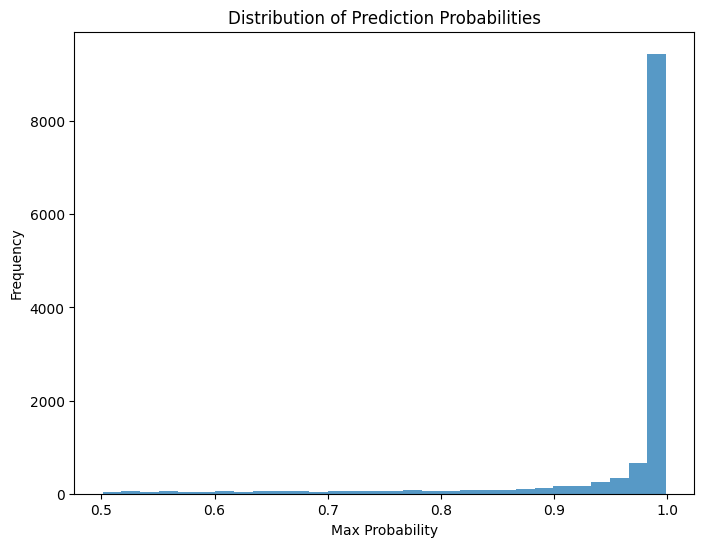

In [42]:
# Access the logits from the TFSequenceClassifierOutput object
logits = y_pred.logits

# Apply softmax to logits to get the probabilities
probabilities = tf.nn.softmax(logits, axis=-1).numpy()

# Plot the distribution of the maximum predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(probabilities.max(axis=1), bins=30, alpha=0.75)
plt.title('Distribution of Prediction Probabilities')
plt.xlabel('Max Probability')
plt.ylabel('Frequency')
plt.show()


In [49]:
path = 'path-to-save'
# Save tokenizer
tokenizer.save_pretrained(path +'/Tokenizer')

# Save model
model.save_pretrained(path +'/Model')

In [50]:
# Load tokenizer
bert_tokenizer = BertTokenizer.from_pretrained(path +'/Tokenizer')

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(path +'/Model')

Some layers from the model checkpoint at path-to-save/Model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at path-to-save/Model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [51]:
pred = bert_model.predict(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])

# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

label = {
    1: 'positive',
    0: 'Negative'
}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
Actual = [label[i] for i in y_test]

print('Predicted Label :', pred_labels[:10])
print('Actual Label    :', Actual[:10])

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



391/391 [==============================] - 114s 290ms/step
Predicted Label : ['positive', 'positive', 'Negative', 'positive', 'Negative', 'Negative', 'Negative', 'Negative', 'positive', 'positive']
Actual Label    : ['positive', 'positive', 'Negative', 'positive', 'Negative', 'Negative', 'Negative', 'Negative', 'positive', 'positive']


In [52]:
print("Classification Report: \n", classification_report(Actual, pred_labels))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.83      0.92      0.87      6250
    positive       0.91      0.81      0.86      6250

    accuracy                           0.86     12500
   macro avg       0.87      0.86      0.86     12500
weighted avg       0.87      0.86      0.86     12500



In [53]:
def Get_sentiment(Review, Tokenizer=bert_tokenizer, Model=bert_model):
    # Convert Review to a list if it's not already a list
    if not isinstance(Review, list):
        Review = [Review]

    Input_ids, Token_type_ids, Attention_mask = Tokenizer.batch_encode_plus(Review,
                                                                             padding=True,
                                                                             truncation=True,
                                                                             max_length=128,
                                                                             return_tensors='tf').values()
    prediction = Model.predict([Input_ids, Token_type_ids, Attention_mask])

    # Use argmax along the appropriate axis to get the predicted labels
    pred_labels = tf.argmax(prediction.logits, axis=1)

    # Convert the TensorFlow tensor to a NumPy array and then to a list to get the predicted sentiment labels
    pred_labels = [label[i] for i in pred_labels.numpy().tolist()]
    return pred_labels

In [54]:
Review ='''Bahubali is a blockbuster Indian movie that was released in 2015.
It is the first part of a two-part epic saga that tells the story of a legendary hero who fights for his kingdom and his love.
The movie has received rave reviews from critics and audiences alike for its stunning visuals,
spectacular action scenes, and captivating storyline.'''
Get_sentiment(Review)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



1/1 [==============================] - 0s 255ms/step


['positive']

In [55]:
Review ='' 'The movie was a complete waste of time; the plot was dull and predictable.'''
Get_sentiment(Review)


1/1 [==============================] - 0s 327ms/step


['Negative']